In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor,BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.metrics import r2_score
import statsmodels.api as sm
import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/saptarshipal/DATA/ipl_dataset2013/data/IPL IMB381IPL2013.csv')

df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [3]:
df.shape

(130, 26)

In [4]:
df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl.NO.,130.0,65.500000,37.671829,1.0,33.2500,65.500,97.7500,130.00
AGE,130.0,2.092308,0.576627,1.0,2.0000,2.000,2.0000,3.00
T-RUNS,130.0,2166.715385,3305.646757,0.0,25.5000,542.500,3002.2500,15470.00
T-WKTS,130.0,66.530769,142.676855,0.0,0.0000,7.000,47.5000,800.00
ODI-RUNS-S,130.0,2508.738462,3582.205625,0.0,73.2500,835.000,3523.5000,18426.00
ODI-SR-B,130.0,71.164385,25.898440,0.0,65.6500,78.225,86.7900,116.66
ODI-WKTS,130.0,76.076923,111.205070,0.0,0.0000,18.500,106.0000,534.00
ODI-SR-BL,130.0,34.033846,26.751749,0.0,0.0000,36.600,45.3250,150.00
CAPTAINCY EXP,130.0,0.315385,0.466466,0.0,0.0000,0.000,1.0000,1.00
RUNS-S,130.0,514.246154,615.226335,0.0,39.0000,172.000,925.2500,2254.00


In [7]:
df1 = df.copy()
df1.shape

(130, 26)

In [8]:
df1['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [9]:
df1.drop(df1[(df1['PLAYING ROLE'] == 'Bowler')& (df1['WKTS']==0.0) & (df1['AUCTION YEAR']<2012)].index,axis=0,inplace=True)
df1.shape

(129, 26)

In [10]:
df1[['PLAYER NAME','RUNS-S','RUNS-C']][(df1['PLAYING ROLE'] == 'Batsman')& (df1['RUNS-C']==0.0) & (df1['AUCTION YEAR']<2012)]

,PLAYER NAME,RUNS-S,RUNS-C
4,"Badrinath, S",1317,0
5,"Bailey, GJ",63,0
11,"Chanderpaul, S",25,0
18,"Dravid, RS",1703,0
22,"Fleming, SP",196,0
24,"Gambhir, G",2065,0
27,"Gibbs, HH",886,0
32,"Hayden, ML",1107,0
38,"Hussey, MEK",958,0
42,"Jayawardena, DPMD",1471,0


In [11]:
df1.drop(df1[(df1['PLAYING ROLE'] == 'Batsman')& (df1['T-RUNS']==0.0) & (df1['AUCTION YEAR']<2012)].index,axis=0,inplace=True)
df1.shape

(120, 26)

In [12]:
df1[(df1['PLAYING ROLE'] == 'Allrounder')& (df1['T-RUNS']==0.0) & (df1['AUCTION YEAR']<2012)]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
33,34,"Henderson, T",3,SA,RR,Allrounder,0,0,0,0.00,...,68.75,1,40,1,40.00,6.66,36.00,2009,100000,650000
34,35,"Henriques, MC",1,AUS,KKR+,Allrounder,0,0,18,60.00,...,108.89,1,142,3,47.33,8.82,32.33,2011,50000,50000
36,37,"Hopes, JR",2,AUS,KXIP,Allrounder,0,0,1326,93.71,...,136.27,11,548,14,39.14,9.13,25.71,2011,200000,350000
37,38,"Hussey, DJ",2,AUS,KKR+,Allrounder,0,0,1488,91.40,...,125.78,48,345,6,57.50,8.85,39.00,2008,100000,625000
39,40,"Jadeja, RA",1,IND,RR+,Allrounder,0,0,860,78.61,...,120.86,35,750,26,28.85,7.33,23.65,2011,100000,950000
58,59,"Mascarenhas, AD",2,ENG,RR+,Allrounder,0,0,245,95.33,...,101.37,1,331,19,17.42,7.01,14.95,2011,100000,100000
71,72,"Nayar, AM",2,IND,MI+,Allrounder,0,0,0,0.00,...,123.19,19,263,7,37.57,8.74,25.86,2011,50000,800000
73,74,"Noffke, AA",2,AUS,RCB,Allrounder,0,0,0,0.00,...,90.00,0,40,1,40.00,10.00,24.00,2010,20000,20000
82,83,"Pathan, YK",2,IND,RR+,Allrounder,0,0,810,113.60,...,149.25,81,1139,36,31.64,7.20,26.36,2008,100000,475000


In [13]:
df1[(df1['PLAYING ROLE'] == 'Batsman')& (df1['AVE']==0.0) & (df1['AUCTION YEAR']<2013)]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE


In [14]:
df1[(df1['PLAYING ROLE']=='Allrounder')&(df1['SIXERS']==0.0)]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.9,13.93,2009,50000,50000
73,74,"Noffke, AA",2,AUS,RCB,Allrounder,0,0,0,0.00,...,90.00,0,40,1,40.00,10.0,24.00,2010,20000,20000
99,100,Shoaib Malik,2,PAK,DD,Allrounder,1606,21,5253,78.37,...,110.63,0,85,2,42.50,10.0,25.50,2008,300000,500000


In [15]:
df1[(df1['PLAYING ROLE'] == 'Bowler')& (df1['ECON']==0.0) & (df1['AUCTION YEAR']<2012)]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE


In [16]:
df1[(df1['ODI-RUNS-S']==10)&(df1['COUNTRY']!='IND')]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE


In [17]:
df1 = df1.drop(df1[(df1['ODI-RUNS-S']==0)&(df1['COUNTRY']!='IND')].index,axis=0)

In [18]:
df1[(df1['ODI-RUNS-S']==0)&(df1['COUNTRY']!='IND')]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE


In [19]:
df1[(df1['RUNS-C']==0.0)&(df1['SIXERS']!=0.0)]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.0,0.0,0.0,2011,100000,800000
9,10,"Boucher, MV",2,SA,RCB+,W. Keeper,5515,1,4686,84.76,...,127.51,13,0,0,0.0,0.0,0.0,2008,200000,450000
13,14,"de Villiers, AB",2,SA,DD+,W. Keeper,5457,2,4998,93.19,...,128.53,42,0,0,0.0,0.0,0.0,2008,200000,300000
15,16,"Dhoni, MS",2,IND,CSK,W. Keeper,3509,0,6773,88.19,...,136.45,64,0,0,0.0,0.0,0.0,2008,400000,1500000
18,19,"Dravid, RS",3,IND,RCB+,Batsman,13288,1,10889,71.24,...,116.88,23,0,0,0.0,0.0,0.0,2011,400000,500000
22,23,"Fleming, SP",3,NZ,CSK,Batsman,7172,0,8037,71.49,...,118.78,3,0,0,0.0,0.0,0.0,2008,350000,350000
24,25,"Gambhir, G",2,IND,DD+,Batsman,3712,0,4819,86.17,...,128.90,32,0,0,0.0,0.0,0.0,2008,220000,725000
27,28,"Gibbs, HH",3,SA,DC,Batsman,6167,0,8094,83.26,...,109.79,31,0,0,0.0,0.0,0.0,2008,250000,575000
28,29,"Gilchrist, AC",3,AUS,DC+,W. Keeper,5570,0,9619,96.94,...,140.21,86,0,0,0.0,0.0,0.0,2008,300000,700000
32,33,"Hayden, ML",3,AUS,CSK,Batsman,8625,0,6133,78.96,...,137.52,44,0,0,0.0,0.0,0.0,2008,225000,375000


In [20]:
df1['PLAYER NAME'].duplicated().sum()

0

In [21]:
df1[df1['T-WKTS']==800]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
69,70,"Muralitharan, M",3,SL,CSK+,Bowler,1261,800,674,77.56,...,66.67,0,1395,57,24.47,6.49,22.63,2008,250000,600000


In [22]:
df1[df1['T-RUNS']==15470]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
111,112,"Tendulkar, SR",3,IND,MI,Batsman,15470,45,18426,86.23,...,119.22,24,58,0,0.0,9.67,0.0,2011,400000,1800000


In [23]:
df1[df1['AVE']==50.11]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
26,27,"Gayle, CH",2,WI,KKR+,Allrounder,6373,72,8087,83.95,...,161.79,129,606,13,46.62,8.05,34.85,2008,250000,800000


In [24]:
df1[df1['BASE PRICE']==df1['BASE PRICE'].min()]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
46,47,Kamran Khan,1,IND,RR+,Bowler,0,0,0,0.0,...,60.0,0,224,9,24.89,8.48,17.78,2009,20000,24000


In [25]:
df1[df1['BASE PRICE']==df1['BASE PRICE'].max()]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
83,84,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.76,...,141.2,30,215,7,30.71,7.41,24.86,2009,1350000,1550000


In [26]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl.NO.,116.0,65.060345,36.394287,3.00,34.500,64.500,95.2500,130.00
AGE,116.0,2.112069,0.586390,1.00,2.000,2.000,2.0000,3.00
T-RUNS,116.0,2425.448276,3410.297726,0.00,81.500,668.500,3724.7500,15470.00
T-WKTS,116.0,74.327586,149.206002,0.00,0.000,9.000,60.5000,800.00
ODI-RUNS-S,116.0,2776.370690,3700.037284,0.00,116.500,1030.000,4490.0000,18426.00
ODI-SR-B,116.0,74.634569,21.591427,0.00,68.965,78.960,87.0175,116.66
ODI-WKTS,116.0,83.577586,114.326470,0.00,1.000,33.500,133.0000,534.00
ODI-SR-BL,116.0,36.325000,26.112425,0.00,29.150,37.250,45.4500,150.00
CAPTAINCY EXP,116.0,0.344828,0.477374,0.00,0.000,0.000,1.0000,1.00
RUNS-S,116.0,505.008621,607.412610,2.00,39.000,172.000,916.2500,2254.00


In [27]:
df2 = df1.drop(columns=['Sl.NO.','PLAYER NAME'])
df2.columns

Index(['AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE', 'T-RUNS', 'T-WKTS',
       'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE', 'SOLD PRICE'],
      dtype='object')

In [28]:
df2.isnull().sum()

AGE              0
COUNTRY          0
TEAM             0
PLAYING ROLE     0
T-RUNS           0
T-WKTS           0
ODI-RUNS-S       0
ODI-SR-B         0
ODI-WKTS         0
ODI-SR-BL        0
CAPTAINCY EXP    0
RUNS-S           0
HS               0
AVE              0
SR-B             0
SIXERS           0
RUNS-C           0
WKTS             0
AVE-BL           0
ECON             0
SR-BL            0
AUCTION YEAR     0
BASE PRICE       0
SOLD PRICE       0
dtype: int64

In [29]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,116.0,2.112069,0.586390,1.00,2.000,2.000,2.0000,3.00
T-RUNS,116.0,2425.448276,3410.297726,0.00,81.500,668.500,3724.7500,15470.00
T-WKTS,116.0,74.327586,149.206002,0.00,0.000,9.000,60.5000,800.00
ODI-RUNS-S,116.0,2776.370690,3700.037284,0.00,116.500,1030.000,4490.0000,18426.00
ODI-SR-B,116.0,74.634569,21.591427,0.00,68.965,78.960,87.0175,116.66
ODI-WKTS,116.0,83.577586,114.326470,0.00,1.000,33.500,133.0000,534.00
ODI-SR-BL,116.0,36.325000,26.112425,0.00,29.150,37.250,45.4500,150.00
CAPTAINCY EXP,116.0,0.344828,0.477374,0.00,0.000,0.000,1.0000,1.00
RUNS-S,116.0,505.008621,607.412610,2.00,39.000,172.000,916.2500,2254.00
HS,116.0,47.491379,36.545742,2.00,16.000,35.000,73.2500,158.00


Axes(0.125,0.11;0.775x0.77)


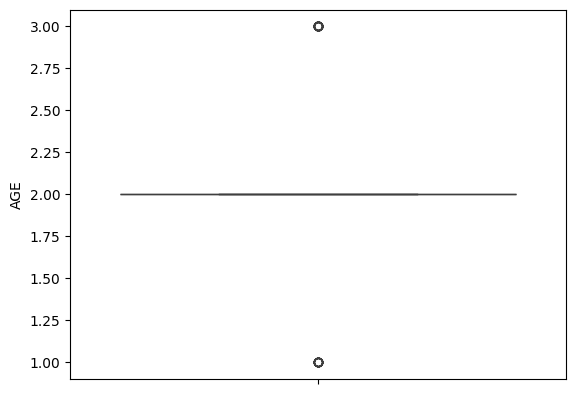

Axes(0.125,0.11;0.775x0.77)


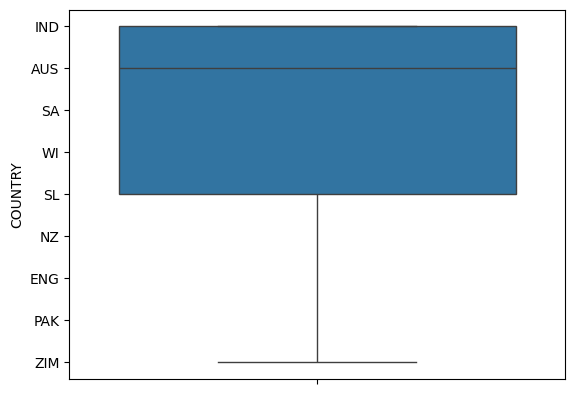

Axes(0.125,0.11;0.775x0.77)


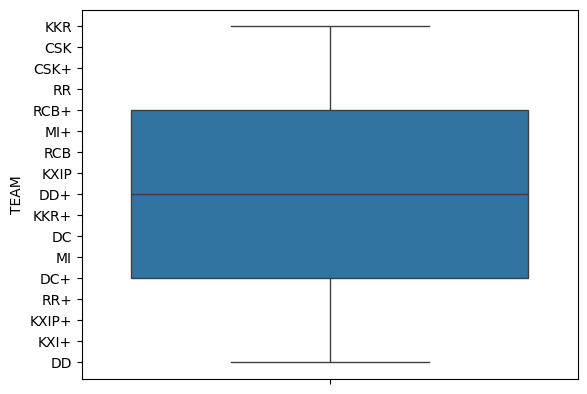

Axes(0.125,0.11;0.775x0.77)


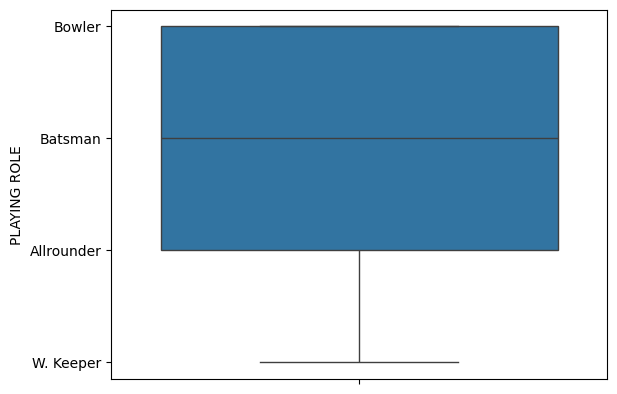

Axes(0.125,0.11;0.775x0.77)


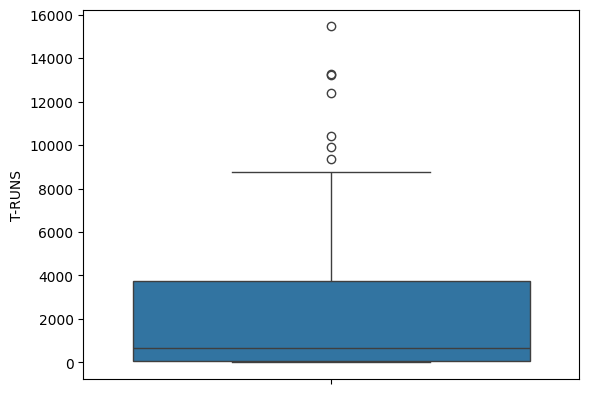

Axes(0.125,0.11;0.775x0.77)


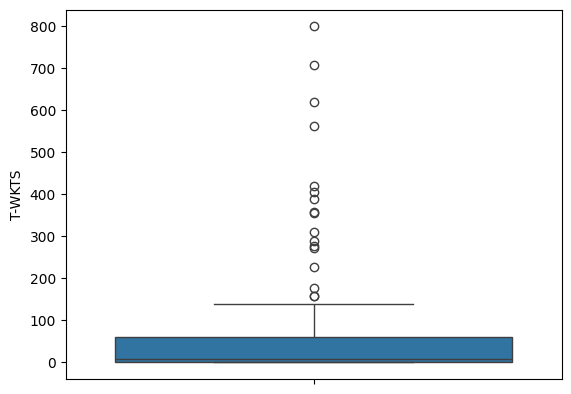

Axes(0.125,0.11;0.775x0.77)


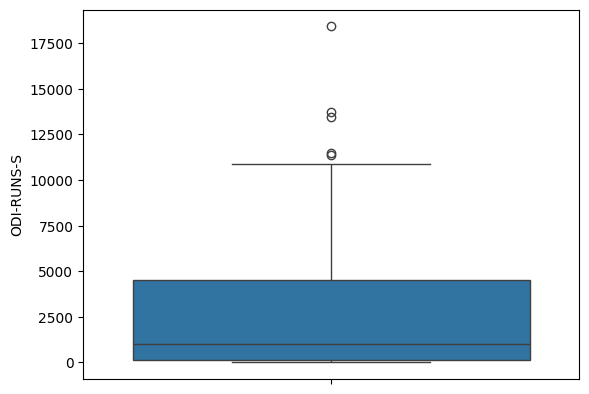

Axes(0.125,0.11;0.775x0.77)


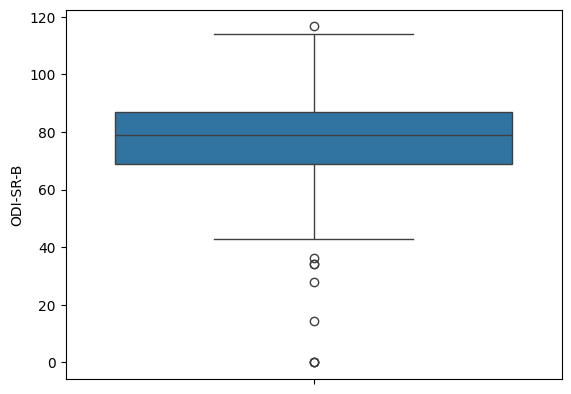

Axes(0.125,0.11;0.775x0.77)


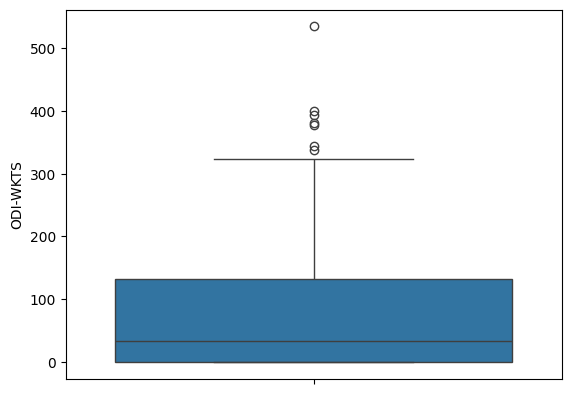

Axes(0.125,0.11;0.775x0.77)


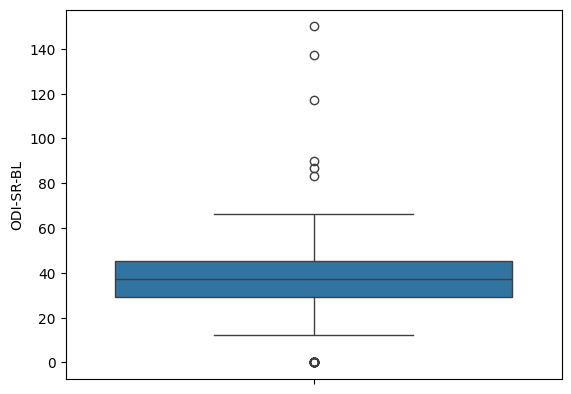

Axes(0.125,0.11;0.775x0.77)


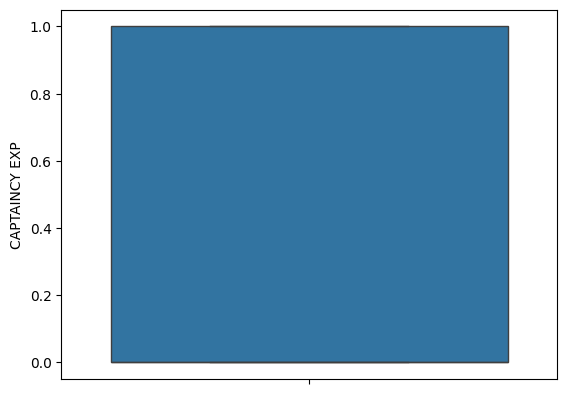

Axes(0.125,0.11;0.775x0.77)


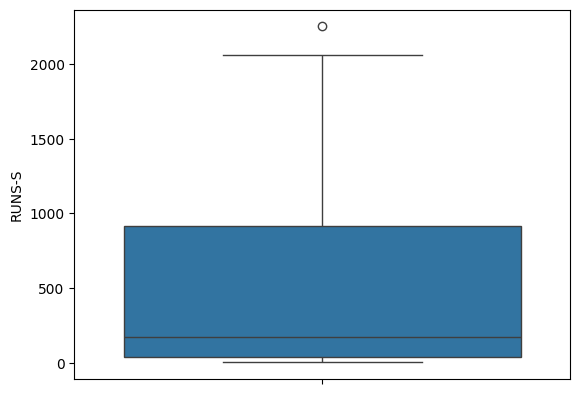

Axes(0.125,0.11;0.775x0.77)


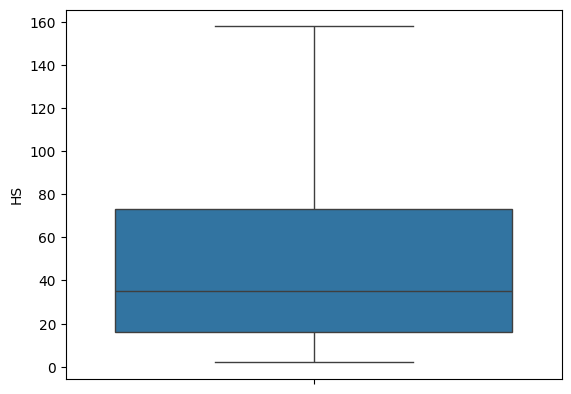

Axes(0.125,0.11;0.775x0.77)


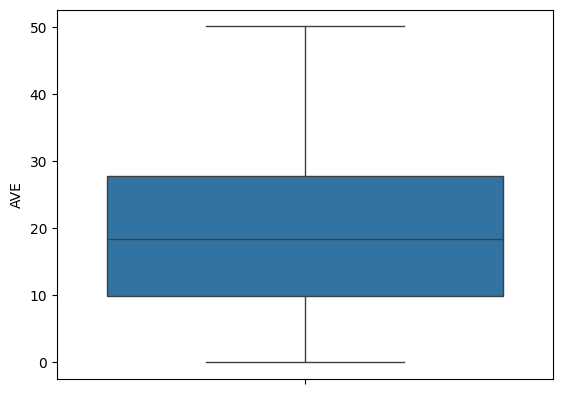

Axes(0.125,0.11;0.775x0.77)


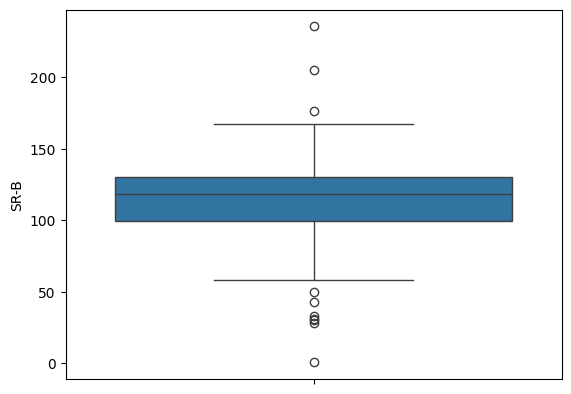

Axes(0.125,0.11;0.775x0.77)


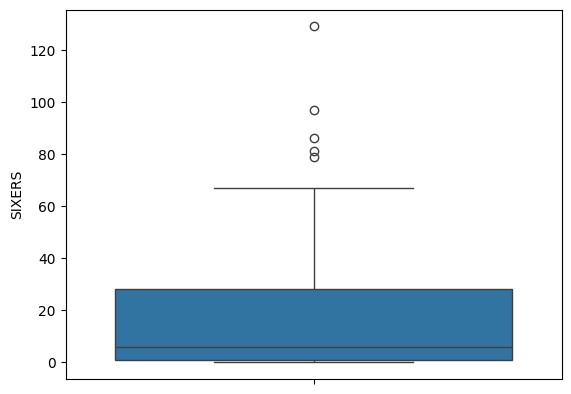

Axes(0.125,0.11;0.775x0.77)


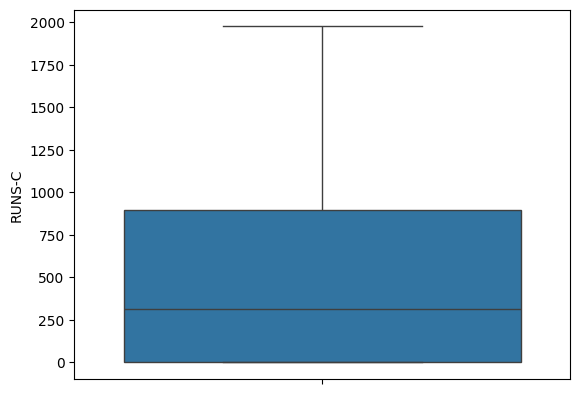

Axes(0.125,0.11;0.775x0.77)


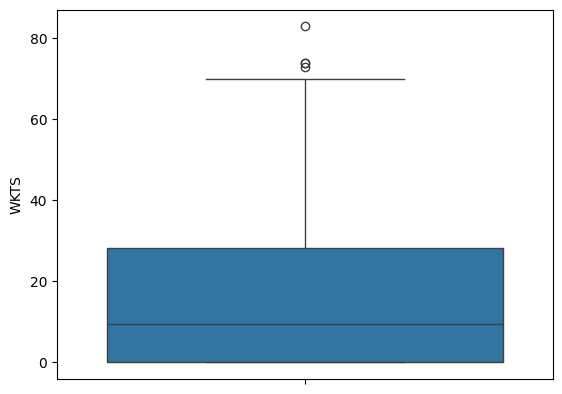

Axes(0.125,0.11;0.775x0.77)


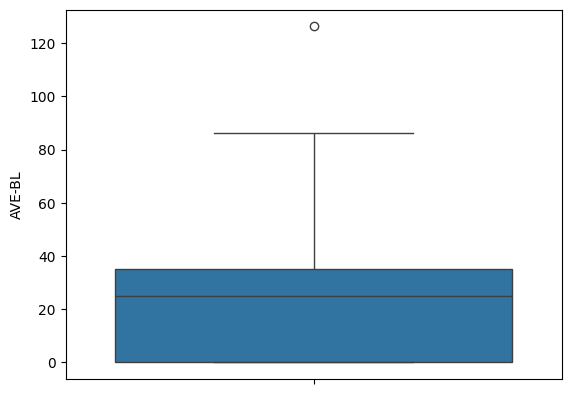

Axes(0.125,0.11;0.775x0.77)


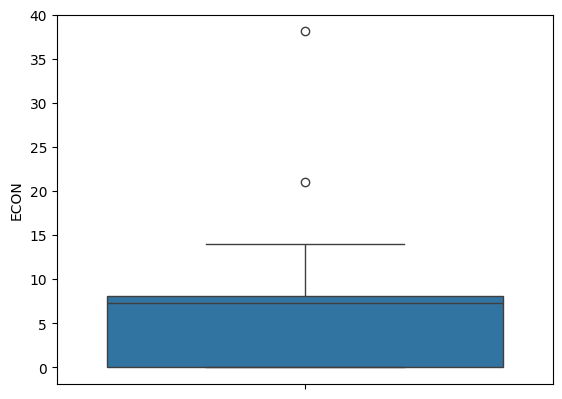

Axes(0.125,0.11;0.775x0.77)


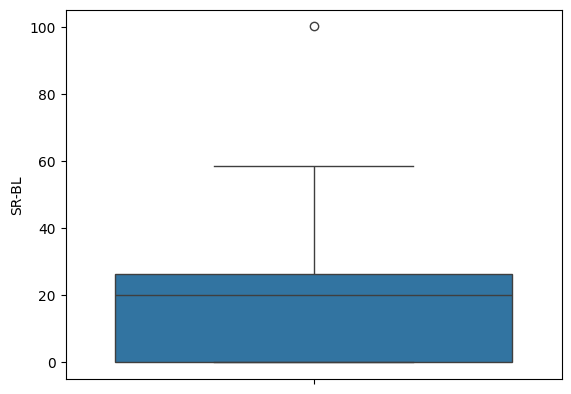

Axes(0.125,0.11;0.775x0.77)


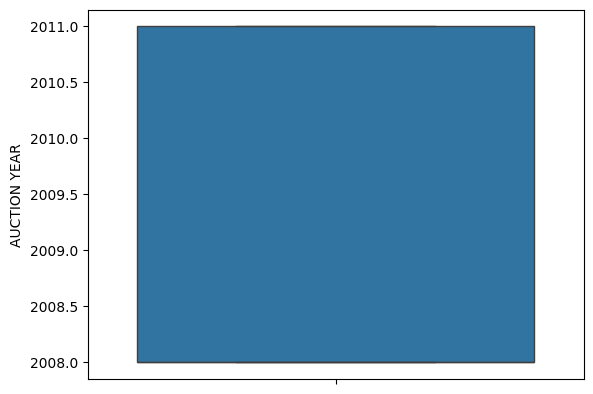

Axes(0.125,0.11;0.775x0.77)


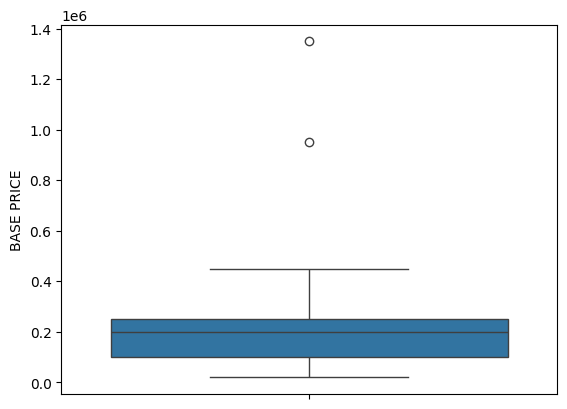

Axes(0.125,0.11;0.775x0.77)


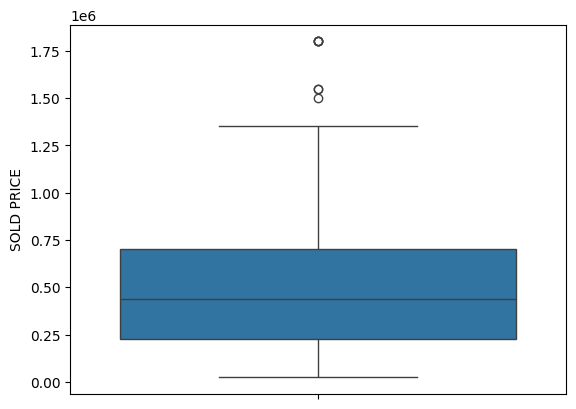

In [30]:
for column in df2.columns:
    print(sns.boxplot(df2[column]))
    plt.show()

In [31]:
df2.columns[df2.dtypes =='object']

Index(['COUNTRY', 'TEAM', 'PLAYING ROLE'], dtype='object')

In [32]:
for column in df2.columns[df2.dtypes =='object']:
    print(str(column) + ' has ' +str(df2[column].nunique())+" unique values")

COUNTRY has 9 unique values
TEAM has 17 unique values
PLAYING ROLE has 4 unique values


In [33]:
encoder = LabelEncoder()
df2['COUNTRY'] = encoder.fit_transform(df2['COUNTRY'])
df2['TEAM'] = encoder.fit_transform(df2['TEAM'])
df2['PLAYING ROLE'] = encoder.fit_transform(df2['PLAYING ROLE'])
df2.drop(columns=['AGE'],inplace =True)
df2.head()

,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
2,2,6,2,571,58,1269,80.62,288,32.9,0,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,2,0,2,284,31,241,84.56,51,36.8,0,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,2,0,1,63,0,79,45.93,0,0.0,0,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000
6,2,1,2,51,27,120,78.94,34,42.5,0,...,72.22,1,1342,52,25.81,7.98,19.40,2011,100000,500000
7,0,0,2,54,50,50,92.59,62,31.3,0,...,165.88,1,693,37,18.73,7.22,15.57,2011,200000,700000


<Axes: >

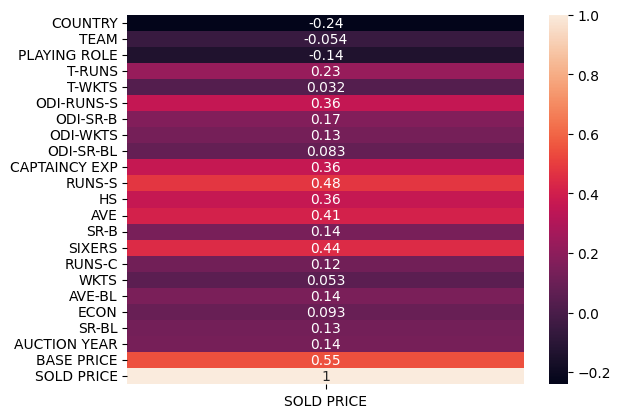

In [34]:
df3 = df2.copy()
sns.heatmap(df3.corr()[['SOLD PRICE']],annot = True)

In [35]:
df3.corr()[['SOLD PRICE']].sort_values(by = ['SOLD PRICE'])

,SOLD PRICE
COUNTRY,-0.240776
PLAYING ROLE,-0.138306
TEAM,-0.054085
T-WKTS,0.032347
WKTS,0.053330
ODI-SR-BL,0.082811
ECON,0.092812
RUNS-C,0.118932
SR-BL,0.126809
ODI-WKTS,0.128178


In [36]:

#df4 = df3.copy()
#df4 = df3.drop(columns = ['TEAM','T-WKTS','ODI-SR-BL','WKTS','ECON'])
#df4 = df3.drop(columns = ['COUNTRY','TEAM','PLAYING ROLE','T-WKTS','WKTS','ECON'])
df4 = df3.drop(columns = ['COUNTRY','TEAM','PLAYING ROLE','T-WKTS','ECON'])
#df4 = df3.drop(columns = ['COUNTRY','TEAM','PLAYING ROLE','T-WKTS','WKTS','ECON','AUCTION YEAR'])
df4.columns

Index(['T-RUNS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE', 'SOLD PRICE'],
      dtype='object')

In [37]:
#Splitting the dataset into X and y

X = df4.drop(columns = 'SOLD PRICE')
y = df4['SOLD PRICE']

print(X.shape,y.shape)

(116, 17) (116,)


In [38]:
y = pd.DataFrame(y)
y.shape

(116, 1)

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=432,shuffle=True)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(92, 17) (24, 17) (92, 1) (24, 1)


In [40]:
#MinMAx Scaler

scaler = MinMaxScaler()

X_train_sc = scaler.fit_transform(X_train)
X_train_sc

array([[0.20387847, 0.05524802, 0.617521  , ..., 0.20908184, 0.        ,
        0.32330827],
       [0.01777634, 0.01774666, 0.6326933 , ..., 0.15658683, 0.        ,
        0.13533835],
       [0.04033613, 0.14940844, 0.61743528, ..., 0.        , 0.        ,
        0.07894737],
       ...,
       [0.28998061, 0.11424075, 0.70229727, ..., 0.27694611, 0.        ,
        0.17293233],
       [0.03691015, 0.06887007, 0.69106806, ..., 0.24850299, 0.        ,
        0.13533835],
       [0.35649644, 0.25431456, 0.7265558 , ..., 0.        , 0.        ,
        0.13533835]])

In [41]:
X_train_sc = pd.DataFrame(X_train_sc,columns = X_train.columns)
X_train_sc

,T-RUNS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,SR-BL,AUCTION YEAR,BASE PRICE
0,0.203878,0.055248,0.617521,0.548689,0.242000,1.0,0.087034,0.253968,0.181226,0.361933,0.046512,0.732658,0.686747,0.201029,0.209082,0.0,0.323308
1,0.017776,0.017747,0.632693,0.346442,0.207333,0.0,0.027531,0.119048,0.098147,0.404267,0.031008,0.699241,1.000000,0.131750,0.156587,0.0,0.135338
2,0.040336,0.149408,0.617435,0.000000,0.000000,0.0,0.114121,0.253968,0.272653,0.424642,0.046512,0.000000,0.000000,0.000000,0.000000,0.0,0.078947
3,0.142211,0.108759,0.697668,0.265918,0.227333,0.0,0.371670,0.539683,0.549175,0.557757,0.294574,0.677468,0.566265,0.225416,0.210679,1.0,0.135338
4,0.103814,0.285086,0.671781,0.260300,0.317333,1.0,0.022202,0.174603,0.244349,0.464429,0.000000,0.043038,0.024096,0.336500,0.254491,0.0,0.210526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.114738,0.436937,0.750729,0.204120,0.295333,1.0,0.548401,0.507937,0.515577,0.584696,0.519380,0.288101,0.277108,0.195883,0.210878,1.0,0.285714
88,0.450743,0.728861,0.781845,0.604869,0.306667,1.0,0.340142,0.888889,0.538180,0.655329,0.302326,0.197468,0.156627,0.237530,0.225749,0.0,0.172932
89,0.289981,0.114241,0.702297,0.528090,0.304667,1.0,0.052842,0.214286,0.287721,0.444338,0.015504,0.444557,0.337349,0.248298,0.276946,0.0,0.172932
90,0.036910,0.068870,0.691068,0.539326,0.219333,0.0,0.073268,0.293651,0.357565,0.523176,0.038760,0.536203,0.349398,0.289153,0.248503,0.0,0.135338


In [42]:
X_test_sc = scaler.fit_transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc,columns = X_test.columns)

y_train_sc = scaler.fit_transform(y_train)
y_train_sc = pd.DataFrame(y_train_sc,columns = y_train.columns)

y_test_sc = scaler.fit_transform(y_test)
y_test_sc = pd.DataFrame(y_test_sc,columns = y_test.columns)

In [43]:


def evaluate_regressors(X_train_sc,X_test_sc,y_train_sc,y_test_sc):

    models = {'lr':LinearRegression()
            ,'ridge':Ridge()
            ,'lasso':Lasso()
            ,'ElasticNet':ElasticNet()
            ,'SGDRegressor':SGDRegressor()
            ,'BayesianRidge':BayesianRidge()
            ,'DecisionTreeRegressor':DecisionTreeRegressor()
            ,'RandomForestRegressor':RandomForestRegressor()
            ,'ExtraTreesRegressor':ExtraTreesRegressor()
            ,'KNeighborsRegressor':KNeighborsRegressor()
            ,'SVR':SVR()
            ,'GaussianProcessRegressor':GaussianProcessRegressor()}

    results=[]
    for name,model in models.items():
        
        model.fit(X_train_sc, y_train_sc)
        y_pred = model.predict(X_test_sc)
        score = r2_score(y_test_sc,y_pred)
        results.append({"Model":name,"Score":score})
    
    df_results = pd.DataFrame(results).sort_values(by=['Score',],ascending=False, ignore_index= True)
    return df_results

df_scores = evaluate_regressors(X_train_sc,X_test_sc,y_train_sc,y_test_sc)
print(df_scores)



                       Model     Score
0        KNeighborsRegressor  0.401419
1               SGDRegressor  0.388892
2                      ridge  0.320029
3        ExtraTreesRegressor  0.234278
4                        SVR  0.075849
5      RandomForestRegressor  0.039966
6                      lasso -0.008672
7                 ElasticNet -0.008672
8              BayesianRidge -0.080481
9                         lr -0.475996
10     DecisionTreeRegressor -0.526006
11  GaussianProcessRegressor -1.665374


In [44]:
print("The best model is "+str(df_scores.iloc[0,0])+ " with the rmse of "+str(df_scores.iloc[0,1]))

The best model is KNeighborsRegressor with the rmse of 0.4014185489753964


In [45]:

selected_model = SGDRegressor()
selected_model.fit(X_train_sc,y_train_sc)
y_predict = pd.DataFrame(selected_model.predict(X_test_sc))

#print(X_train_sc.shape,y_train_sc.shape,y_predict.shape)

predictions = scaler.inverse_transform(y_predict)
predictions = pd.DataFrame(predictions)
#print(type(predictions),type(y_test))
pred_comparison = pd.concat([predictions,y_test],axis =1)

print(pred_comparison)



                0  SOLD PRICE
0    5.010018e+05         NaN
1    5.290864e+05         NaN
2    6.551731e+05         NaN
3    5.819298e+05         NaN
4    6.838215e+05         NaN
5    7.044696e+05         NaN
6    6.855340e+05    500000.0
7    5.300726e+05         NaN
8    7.608963e+05    950000.0
9    5.397124e+05         NaN
10   5.259467e+05         NaN
11   7.363123e+05         NaN
12   3.944323e+05         NaN
13   8.894909e+05         NaN
14   4.009157e+05         NaN
15   7.586361e+05         NaN
16   5.254218e+05         NaN
17   4.642182e+05         NaN
18   6.161584e+05         NaN
19   6.459416e+05         NaN
20   7.194442e+05         NaN
21   6.137912e+05    150000.0
22   1.043955e+06         NaN
23   4.234771e+05         NaN
34            NaN     50000.0
51            NaN    800000.0
72            NaN    850000.0
35            NaN    425000.0
94            NaN    675000.0
84            NaN    550000.0
79            NaN    275000.0
64            NaN    300000.0
107       

In [46]:
selected_model._parameter_constraints

{'fit_intercept': ['boolean'],
 'max_iter': [<sklearn.utils._param_validation.Interval at 0x17574c3d0>],
 'tol': [<sklearn.utils._param_validation.Interval at 0x17574c430>, None],
 'shuffle': ['boolean'],
 'verbose': ['verbose'],
 'random_state': ['random_state'],
 'warm_start': ['boolean'],
 'average': [<sklearn.utils._param_validation.Interval at 0x17574c4c0>,
  bool,
  numpy.bool_],
 'loss': [<sklearn.utils._param_validation.StrOptions at 0x17574d210>],
 'early_stopping': ['boolean'],
 'validation_fraction': [<sklearn.utils._param_validation.Interval at 0x17574d180>],
 'n_iter_no_change': [<sklearn.utils._param_validation.Interval at 0x17574d1b0>],
 'penalty': [<sklearn.utils._param_validation.StrOptions at 0x17574d5a0>,
  None],
 'alpha': [<sklearn.utils._param_validation.Interval at 0x17574d510>],
 'l1_ratio': [<sklearn.utils._param_validation.Interval at 0x17574d540>],
 'power_t': [<sklearn.utils._param_validation.Interval at 0x17574d4e0>],
 'learning_rate': [<sklearn.utils._para

In [47]:
sc = []

for i in range(2,15):
    
    cv_score = cross_val_score(selected_model,X_train_sc,y_train,cv=i)
    sc.append({'cv':i,'score':cv_score.mean()})

cv_score_df = pd.DataFrame(sc).sort_values(by='score',ascending=False, ignore_index= True)
print(cv_score_df)
print("\nThe cv with the best score is "+str(cv_score_df.iloc[0,0]))
    

    cv     score
0    2  0.343839
1    3  0.324531
2    5  0.282034
3    4  0.252051
4    6  0.243279
5    7  0.206505
6    9  0.206276
7    8  0.144301
8   10  0.132274
9   11 -0.035448
10  12 -0.036790
11  13 -0.042814
12  14 -0.159957

The cv with the best score is 2


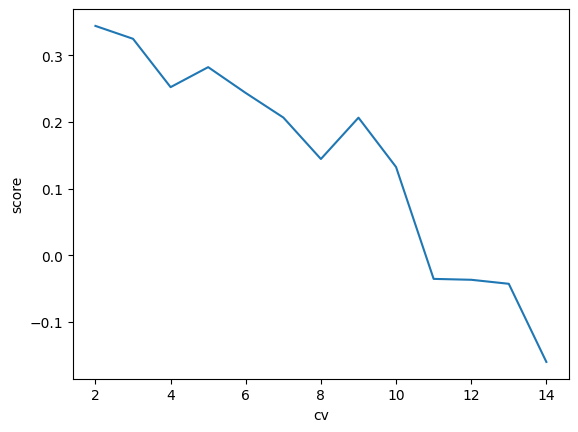

In [48]:
sns.lineplot(x=cv_score_df['cv'],y=cv_score_df['score'])
plt.show()

In [49]:
selected_model.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [50]:
#Hyperparameter tuning GridSearcvCV

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1,100],
 'epsilon': [0.0001, 0.001, 0.01, 0.1,100],
 'eta0': [0.0001, 0.001, 0.01, 0.1,100],
 'l1_ratio': [0.0001, 0.001, 0.01, 0.1,100],
 'power_t': [0.0001, 0.001, 0.01, 0.1,100],
 'tol': [0.0001, 0.001, 0.01, 0.1,100],
 'validation_fraction': [0.0001, 0.001, 0.01, 0.1,100]
 }



gridcv_model = GridSearchCV(estimator=selected_model, param_grid=param_grid, cv= cv_score_df.iloc[0,0],scoring='r2')
gridcv_model .fit(X_train_sc, y_train_sc)
     
print(gridcv_model .best_params_)
print(gridcv_model .best_score_)

{'alpha': 0.01, 'epsilon': 0.0001, 'eta0': 0.1, 'l1_ratio': 0.1, 'power_t': 0.01, 'tol': 0.0001, 'validation_fraction': 0.1}
0.3804837183602759


In [51]:
fin_mod = SGDRegressor(alpha= 0.01, epsilon= 0.0001, eta0= 0.1, l1_ratio= 0.1, power_t= 0.01, tol= 0.0001, validation_fraction= 0.1).fit(X_train_sc, y_train_sc)
fin_mod_y_pred = fin_mod.predict(X_test_sc)
fin_mod_score = r2_score(y_test_sc, fin_mod_y_pred)
fin_mod_score

0.46238403693461294

In [52]:
import joblib
joblib.dump(fin_mod, "ipl2013_1.0.pkl")

['ipl2013_1.0.pkl']